In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [11]:
churn_pred = pd.read_csv("/content/customer_churn_data.csv")
churn_pred.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [12]:
print(churn_pred.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [13]:
churn_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [14]:
churn_pred.shape

(5880, 21)

In [15]:
missing_values = churn_pred.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [16]:
# Counting the number of duplicated rows in the DataFrame
churn_pred.duplicated().value_counts()

,count
False,5880


In [17]:
#Summary Statistics Of Numerical columns
#1. SeniorCitizen

#Mean: 0.5007 indicates that, on average, about 50% of the customers are senior citizens.
#Min and Max: Values range from 0 to 1, confirming it is a binary variable (0 = Not a senior citizen, 1 = Senior citizen).
#25th Percentile and 75th Percentile: The equal distribution between 0 and 1 at these percentiles reinforces that the dataset has an even split of senior and non-senior customers.
#Insight: The company serves an equal proportion of senior and non-senior citizens, which may provide opportunities to tailor services for both groups.

#2. Tenure

#Mean: The average customer has stayed with the company for approximately 36.55 months (~3 years).
#Min: 1 month indicates some customers are new to the company.
#Max: 72 months (~6 years) shows the longest tenure.
#25th and 75th Percentiles: 25% of customers have a tenure of less than 18 months, while 75% have stayed longer than 55 months.
#Insight: A significant portion of customers have relatively short tenure (<18 months), potentially indicating a higher churn risk among new customers.

#3. MonthlyCharges

#Mean: The average monthly charge is dollars 70.16.
#Min and Max: Monthly charges range from dollars 20.00 to 119.99.
#25th and 75th Percentiles: 25% of customers pay less than dollars 45.72, and 75% pay more than dollars 95.46.
#Insight: The wide range of monthly charges may indicate the availability of diverse service plans. Customers in the higher charge brackets could have more premium services, which might impact churn differently.

#4. TotalCharges

#Mean: The average total charge is dollars 2566.81.
#Min and Max: Total charges range from dollars 20.03 to 8589.60.
#25th and 75th Percentiles: 25% of customers have total charges below dollars 1020.22, while 75% of customers have paid over dollars 3767.67.
#Insight: Total charges reflect tenure and monthly charges. Customers with higher total charges are likely long-term customers. However, those with low total charges may be newer or at risk of churn due to lack of commitment.

In [18]:
summary_stat = churn_pred.describe()
print(summary_stat)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


<ipython-input-99-93465e42af89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_pred,x='Churn', palette=['#A94A4A', '#441752'])


<Axes: xlabel='Churn', ylabel='count'>

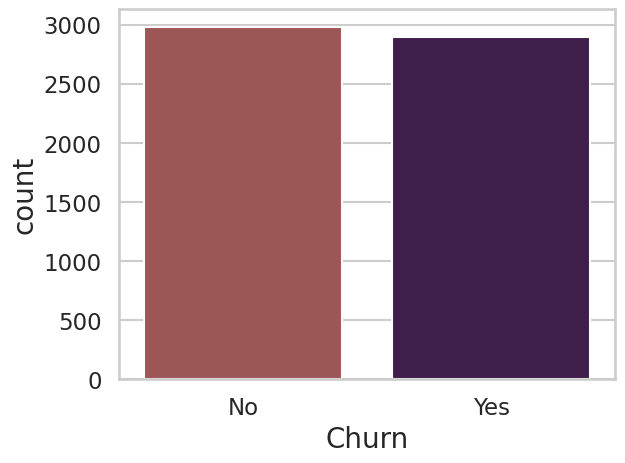

In [99]:
sns.countplot(data=churn_pred,x='Churn', palette=['#A94A4A', '#441752'])


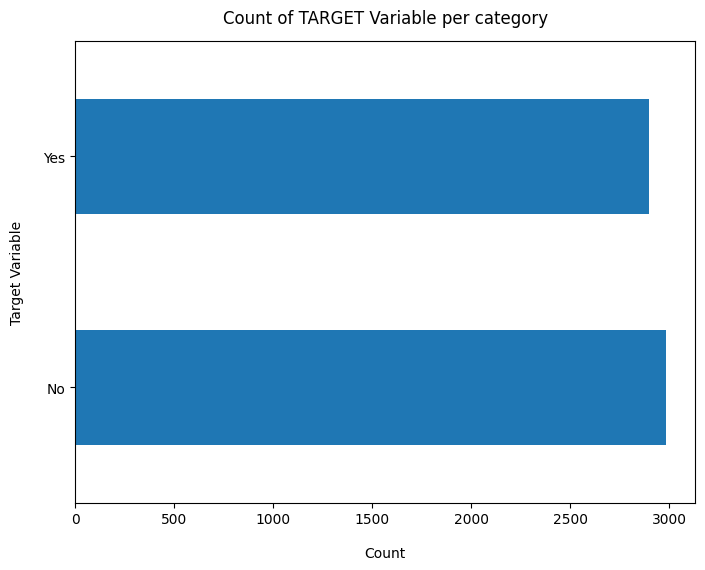

In [20]:
churn_pred['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);


In [21]:
100*churn_pred['Churn'].value_counts()/len(churn_pred['Churn'])

,count
Churn,
No,50.714286
Yes,49.285714


In [22]:
churn_pred['Churn'].value_counts()

,count
Churn,
No,2982
Yes,2898


Data is balanced, with Non churners ratio = 50.714286% and churners ratio = 49.285714.
Total number of Non churners are 2982.
Total number of churners are 2898.
But we will analyse the data with other features while taking the target values separately to get some insights.

**Data Cleaning**

In [23]:

churn_pred_copy = churn_pred.copy()
churn_pred_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


**Summary of Categorical Features**

In [24]:

churn_pred_copy.describe(include=['object']).T

,count,unique,top,freq
customerID,5880,5880,CUST0000,1
gender,5880,2,Male,2950
Partner,5880,2,Yes,2995
Dependents,5880,2,No,3004
PhoneService,5880,2,Yes,2941
MultipleLines,5880,3,No phone service,2939
InternetService,5880,3,No,2029
OnlineSecurity,5880,3,No internet service,2029
OnlineBackup,5880,3,No internet service,2029
DeviceProtection,5880,3,No internet service,2029


In [25]:

print(churn_pred_copy['tenure'].max())

72


In [26]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_pred_copy['tenure_group'] = pd.cut(churn_pred_copy.tenure, range(1, 80, 12), right=False, labels=labels)

In [27]:
churn_pred_copy['tenure_group'].value_counts()

,count
tenure_group,
13 - 24,1019
61 - 72,998
49 - 60,996
1 - 12,982
37 - 48,957
25 - 36,928


**Remove missing values**

In [28]:
churn_pred_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)


In [29]:
churn_pred_copy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5880 non-null   object  
 1   SeniorCitizen     5880 non-null   int64   
 2   Partner           5880 non-null   object  
 3   Dependents        5880 non-null   object  
 4   PhoneService      5880 non-null   object  
 5   MultipleLines     5880 non-null   object  
 6   InternetService   5880 non-null   object  
 7   OnlineSecurity    5880 non-null   object  
 8   OnlineBackup      5880 non-null   object  
 9   DeviceProtection  5880 non-null   object  
 10  TechSupport       5880 non-null   object  
 11  StreamingTV       5880 non-null   object  
 12  StreamingMovies   5880 non-null   object  
 13  Contract          5880 non-null   object  
 14  PaperlessBilling  5880 non-null   object  
 15  PaymentMethod     5880 non-null   object  
 16  MonthlyCharges    5880 n

**Perform EDA Analysis**

**Univariate Analysis**
1. Plot distibution of individual predictors by churn!!
There aren't much insights shown in the Univariate Analysis.

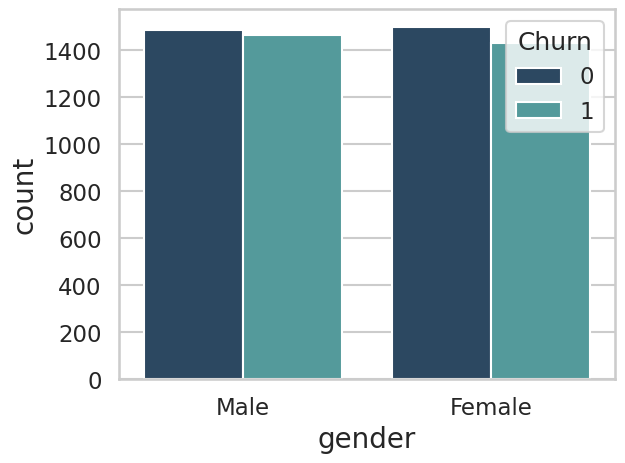

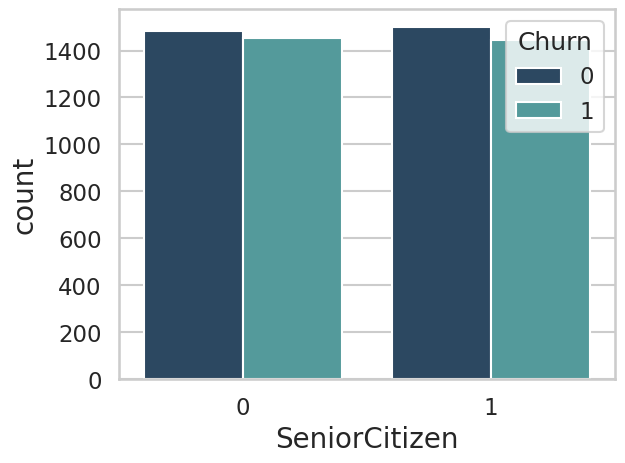

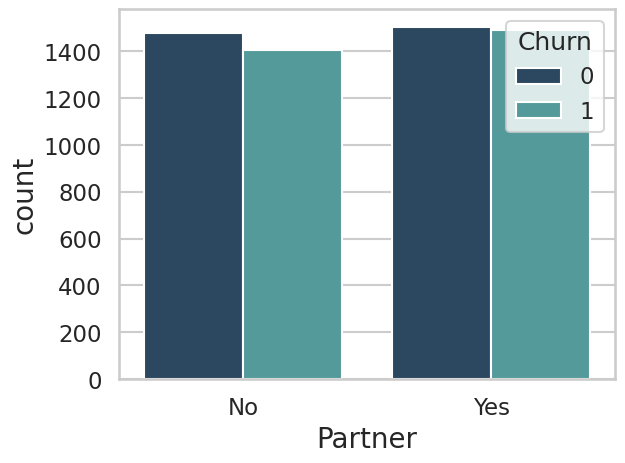

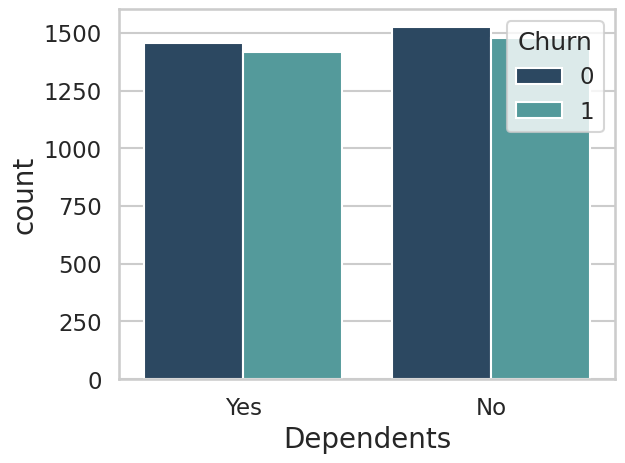

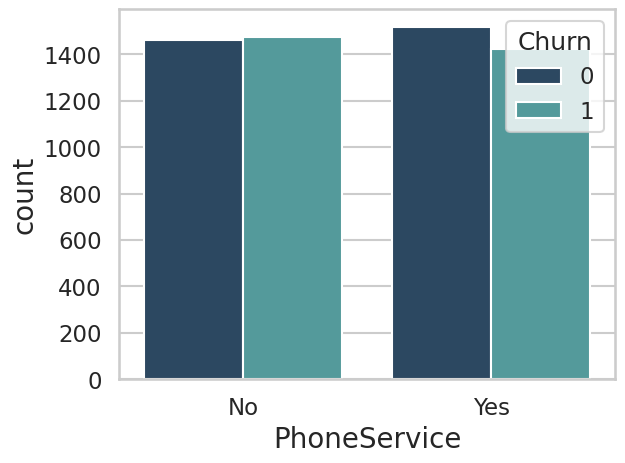

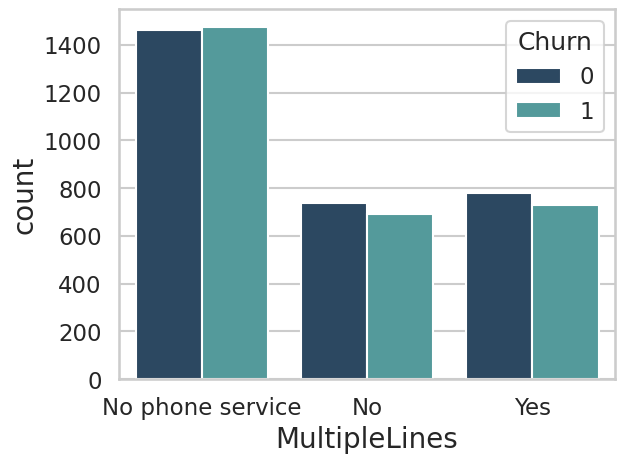

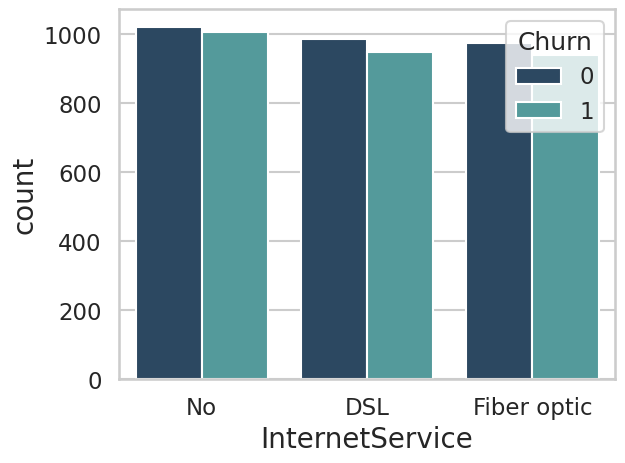

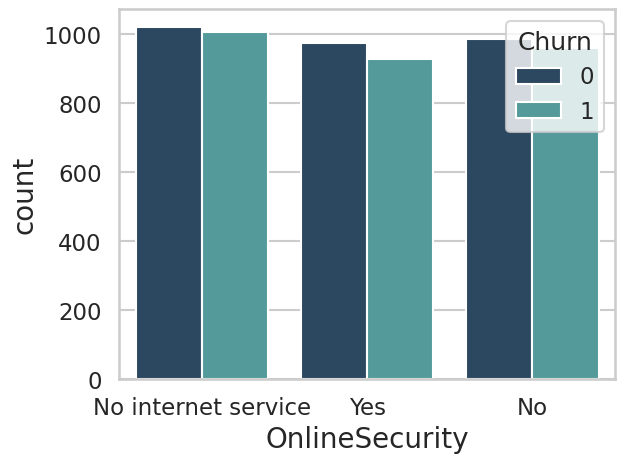

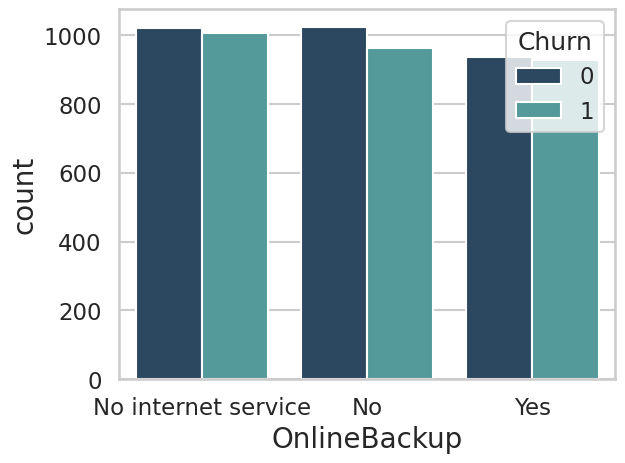

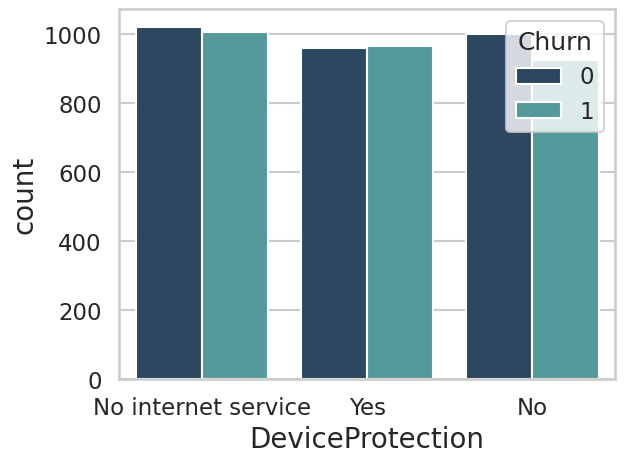

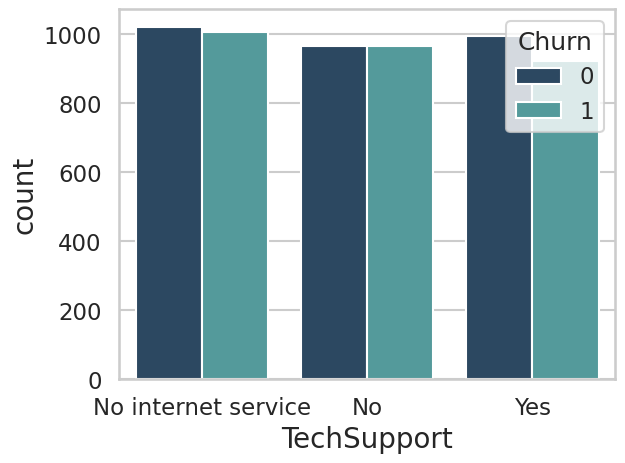

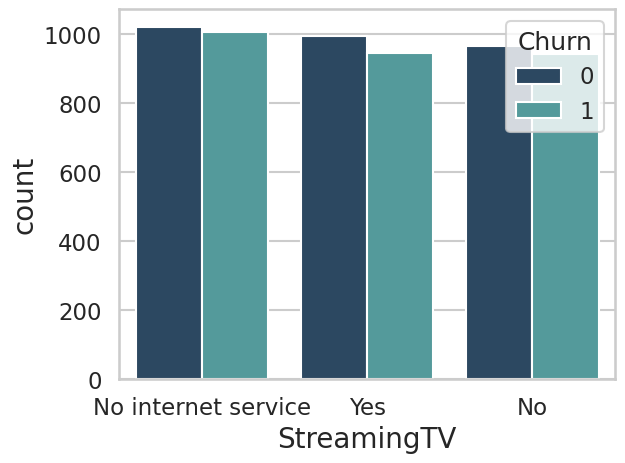

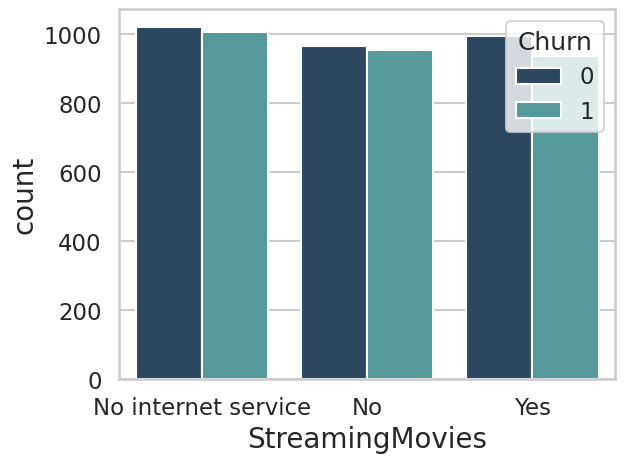

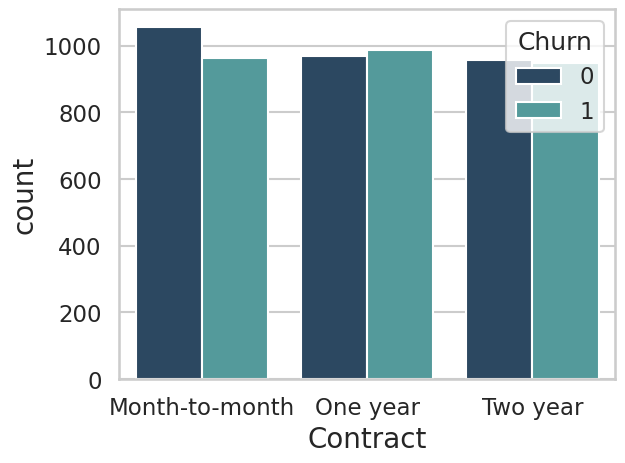

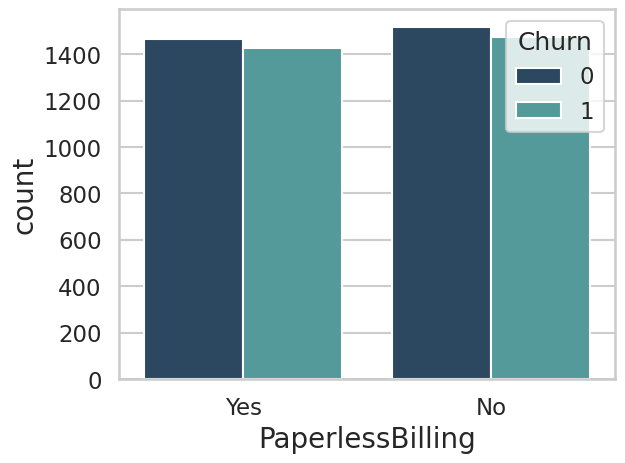

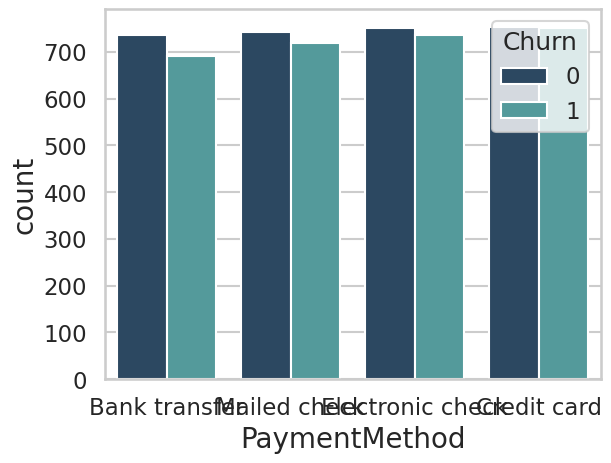

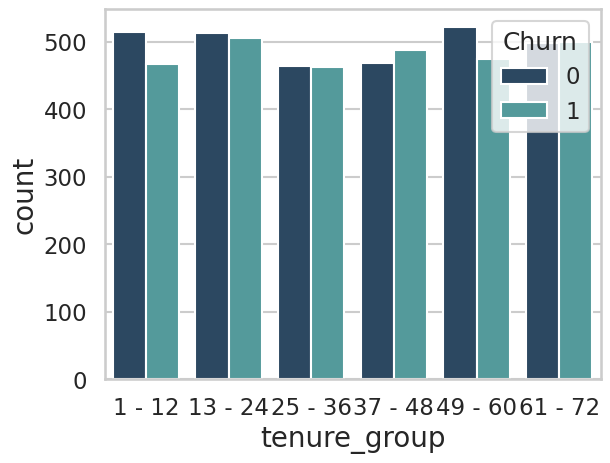

In [98]:
for i, predictor in enumerate(churn_pred_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn_pred_copy, x=predictor, hue='Churn', palette=['#23486A', '#48A6A7'])

In [31]:
churn_pred_copy['Churn'] = np.where(churn_pred_copy.Churn == 'Yes',1,0)

In [32]:

# Get a list of categorical columns
categorical_cols = churn_pred_copy.select_dtypes(include=['object', 'category']).columns

# Create dummy variables using pandas get_dummies
churn_pred_dummies = pd.get_dummies(churn_pred_copy, columns=categorical_cols, drop_first=True)


<ipython-input-33-f1659ec770bd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 0) ],
<ipython-input-33-f1659ec770bd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

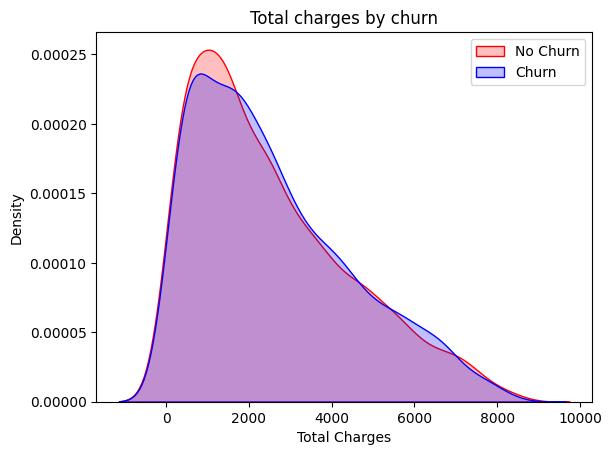

In [33]:
Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(churn_pred_dummies.TotalCharges[(churn_pred_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Feature Extraction**
**Bivariate Analysis**

In [37]:
new_df1_target0=churn_pred_copy.loc[churn_pred_copy["Churn"]==0]
new_df1_target1=churn_pred_copy.loc[churn_pred_copy["Churn"]==1]

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def uniplot(df, col, title, hue=None, palette=['#872341', '#577BC1']):
    # Set style and context
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set figure size based on unique values in the column
    width = len(df[col].unique()) + 7 + (4 * len(df[hue].unique()) if hue else 0)
    fig.set_size_inches(width, 8)

    # Rotate x-ticks and set y-scale
    plt.xticks(rotation=45)
    plt.yscale('log')

    # Set title
    plt.title(title)

    # Create countplot
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette=palette, ax=ax)

# Example usage (make sure to call this outside of the function):
# uniplot(your_dataframe, 'your_column', 'Your Title', hue='your_hue_column')
# plt.show()


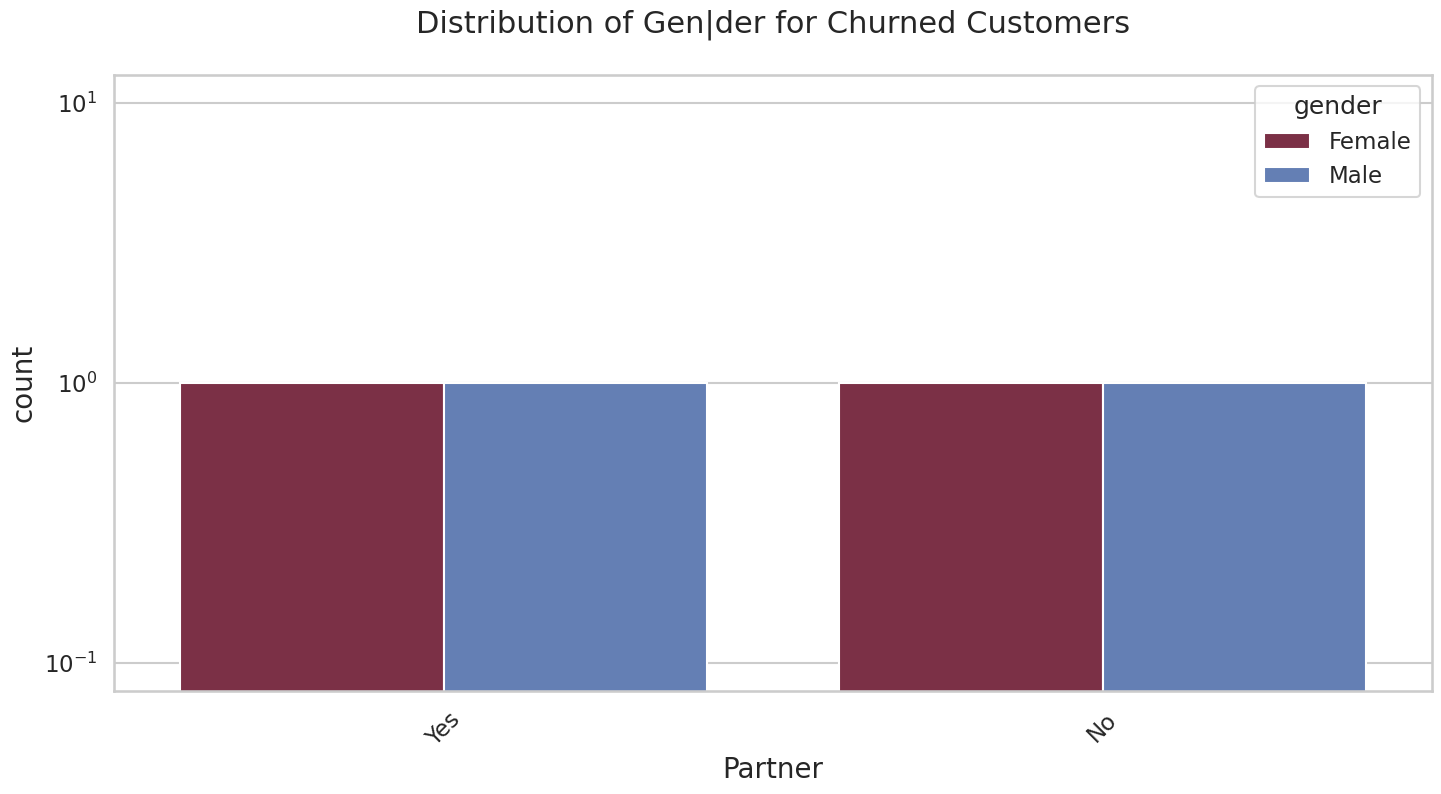

In [86]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gen|der for Churned Customers', hue='gender')


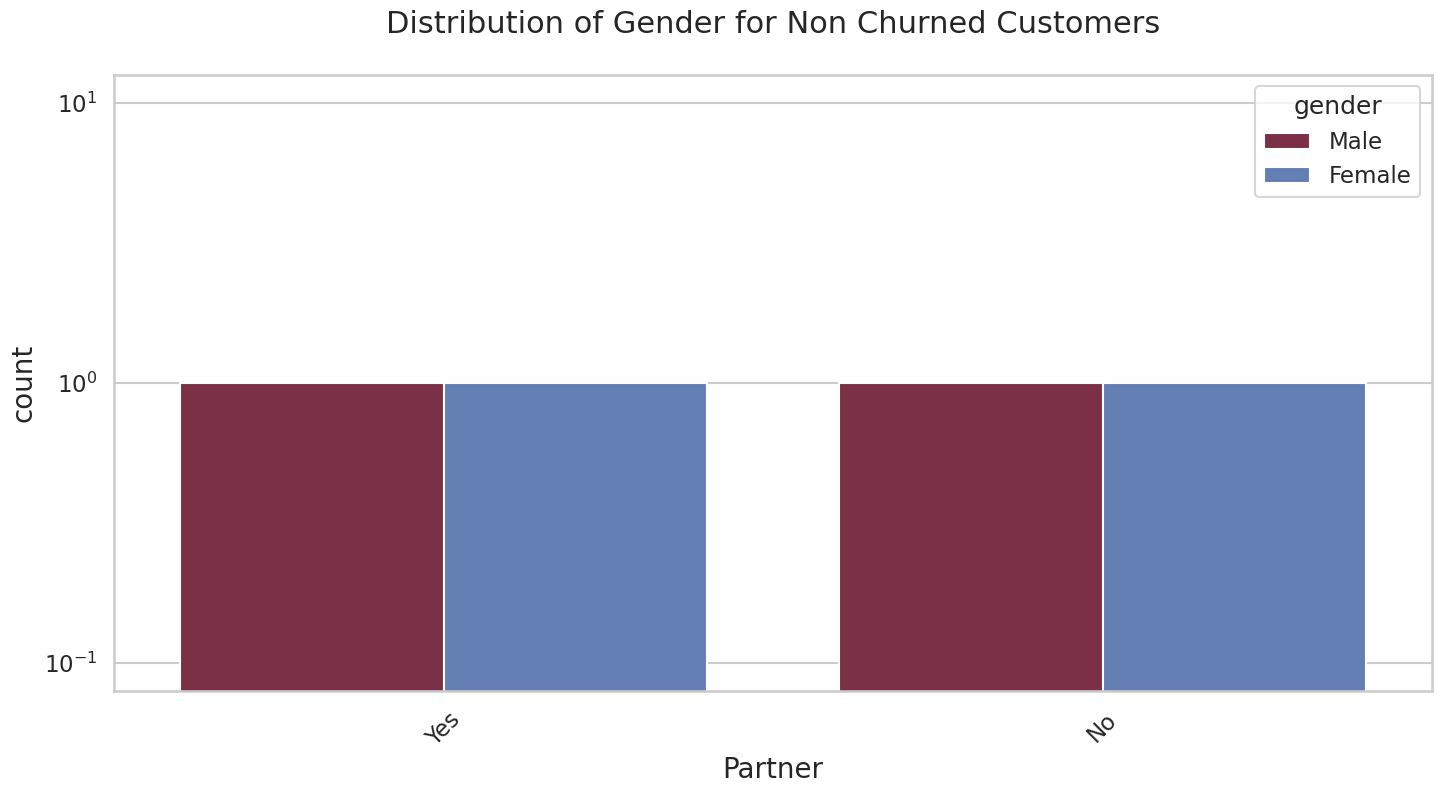

In [87]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

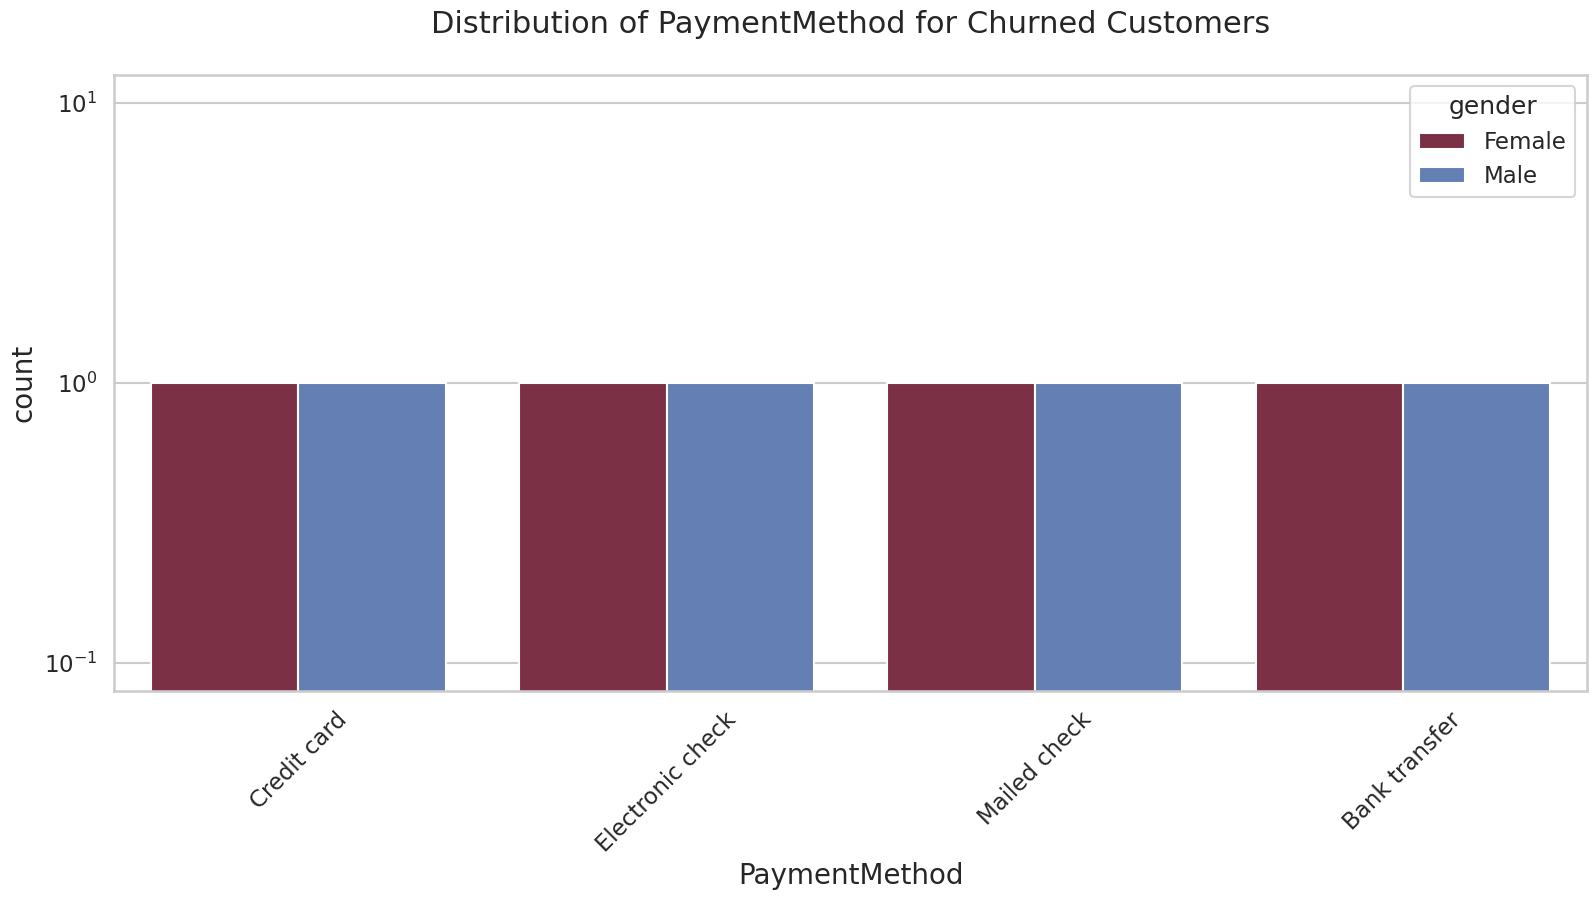

In [88]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

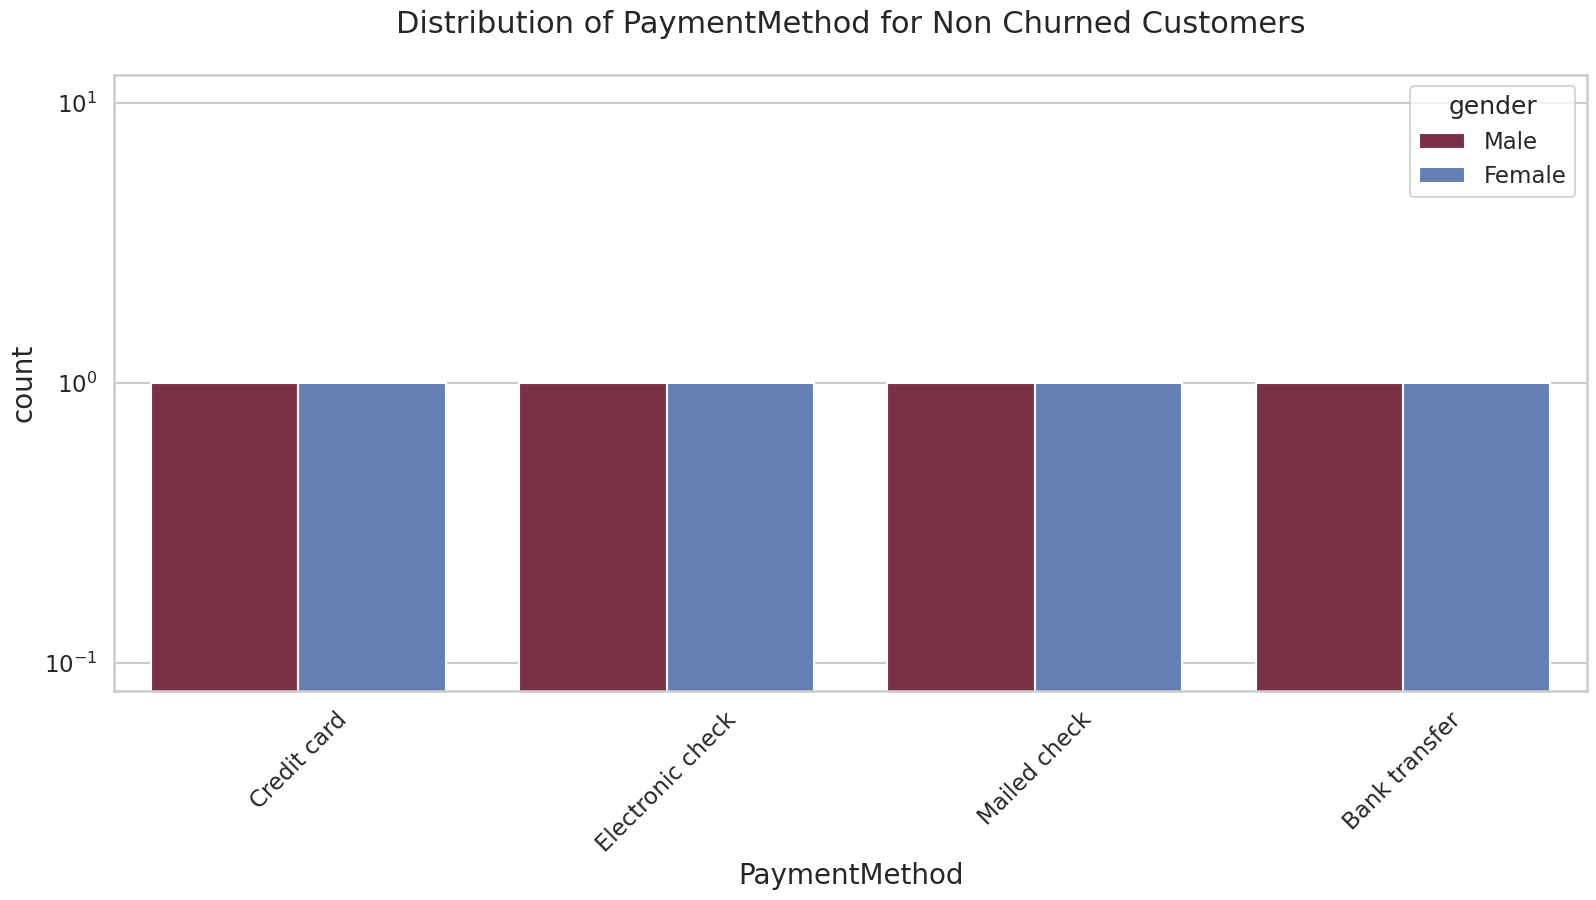

In [89]:
uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of PaymentMethod for Non Churned Customers',hue='gender')

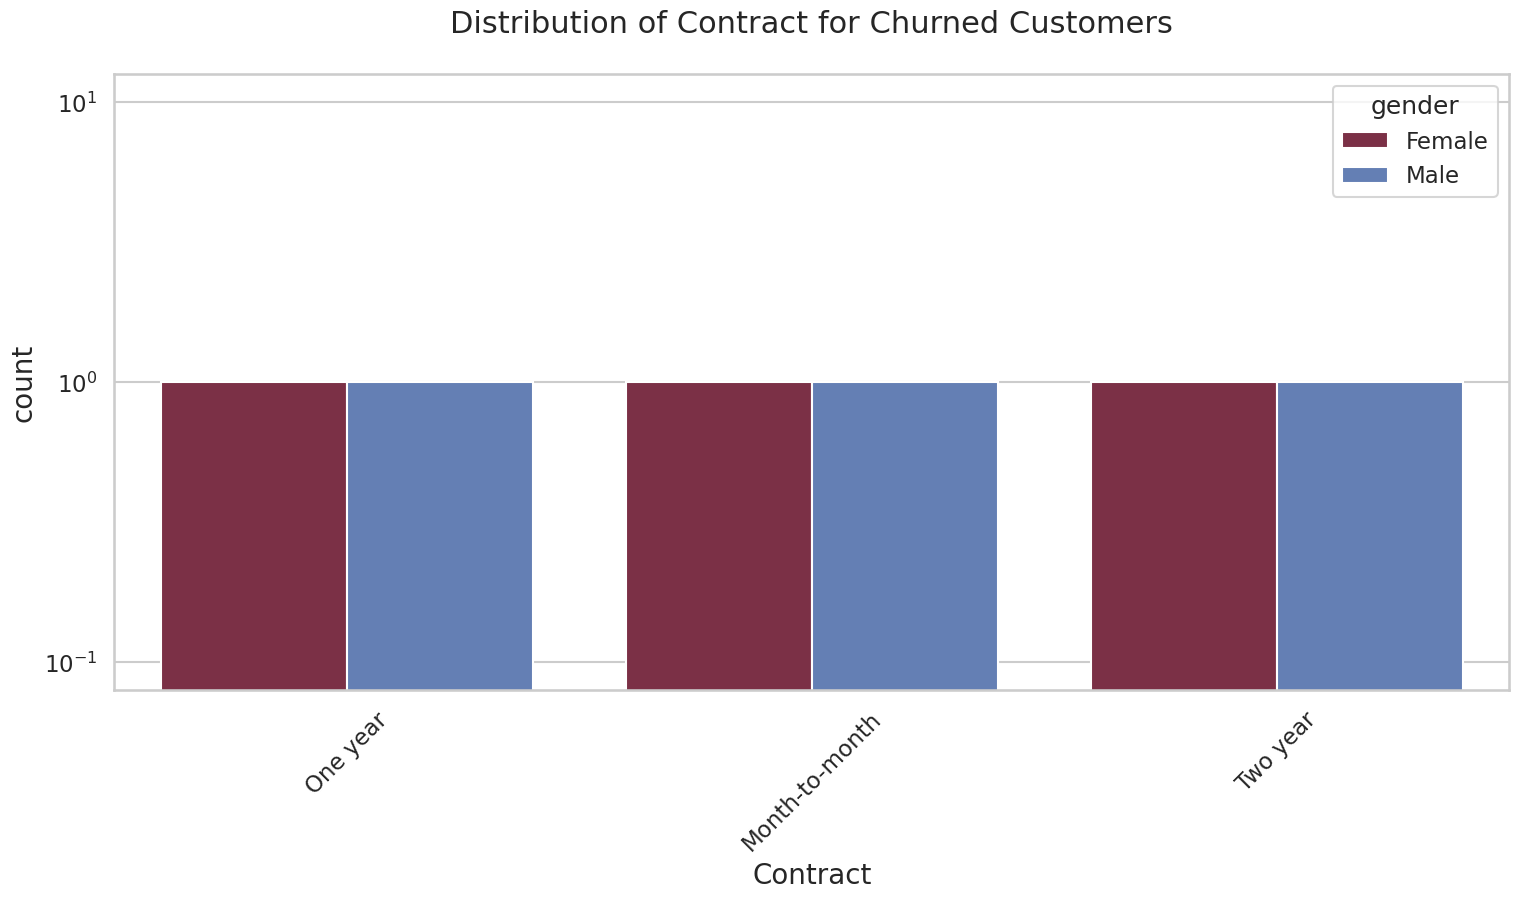

In [90]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

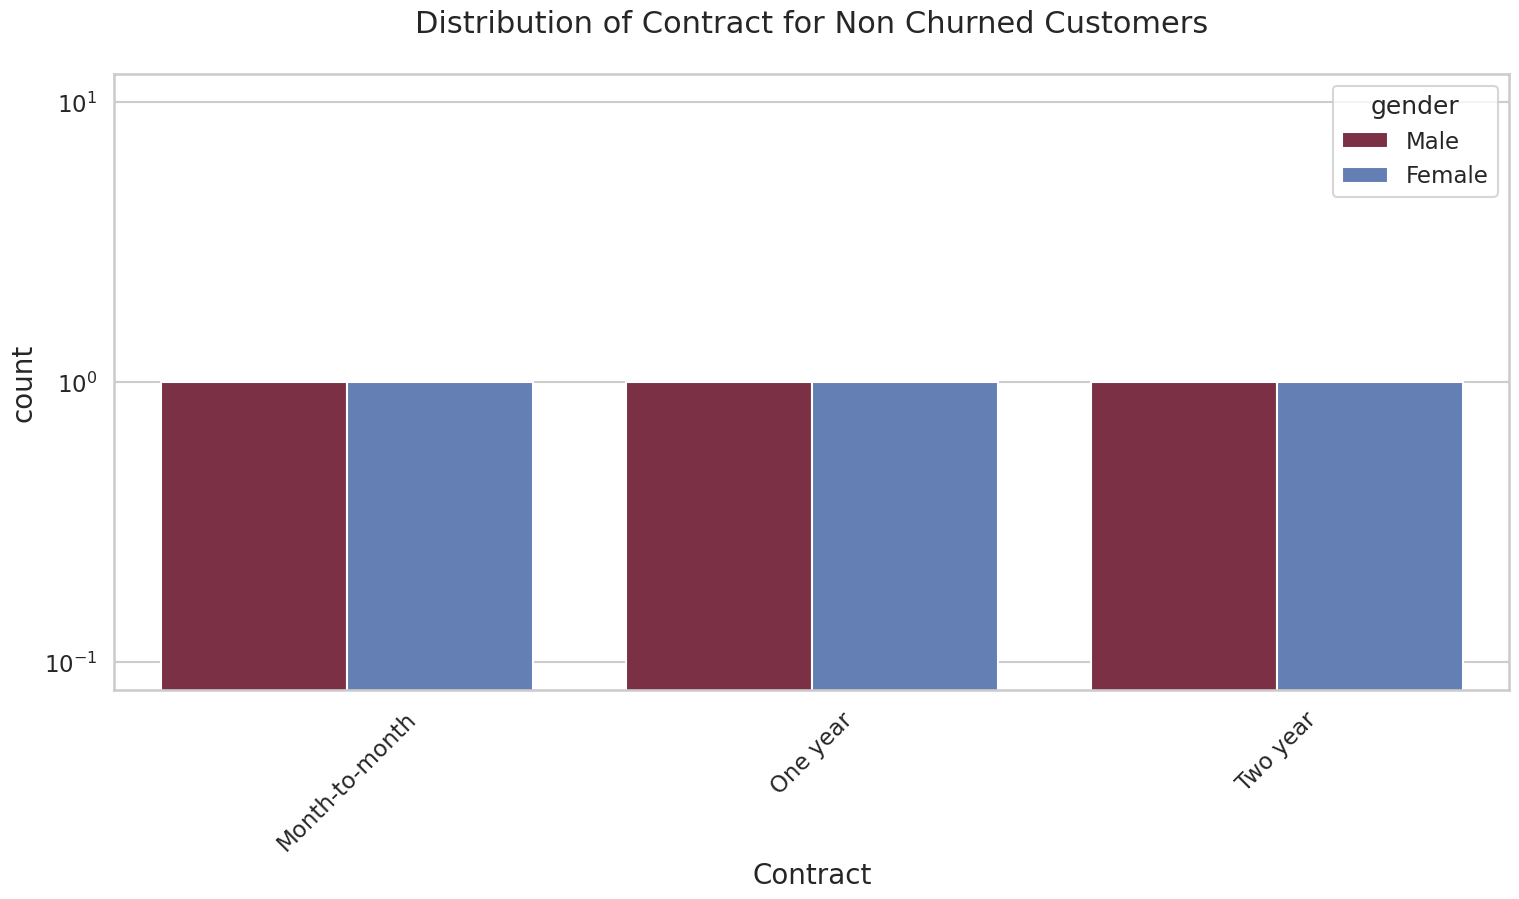

In [91]:
uniplot(new_df1_target0,col='Contract',title='Distribution of Contract for Non Churned Customers',hue='gender')

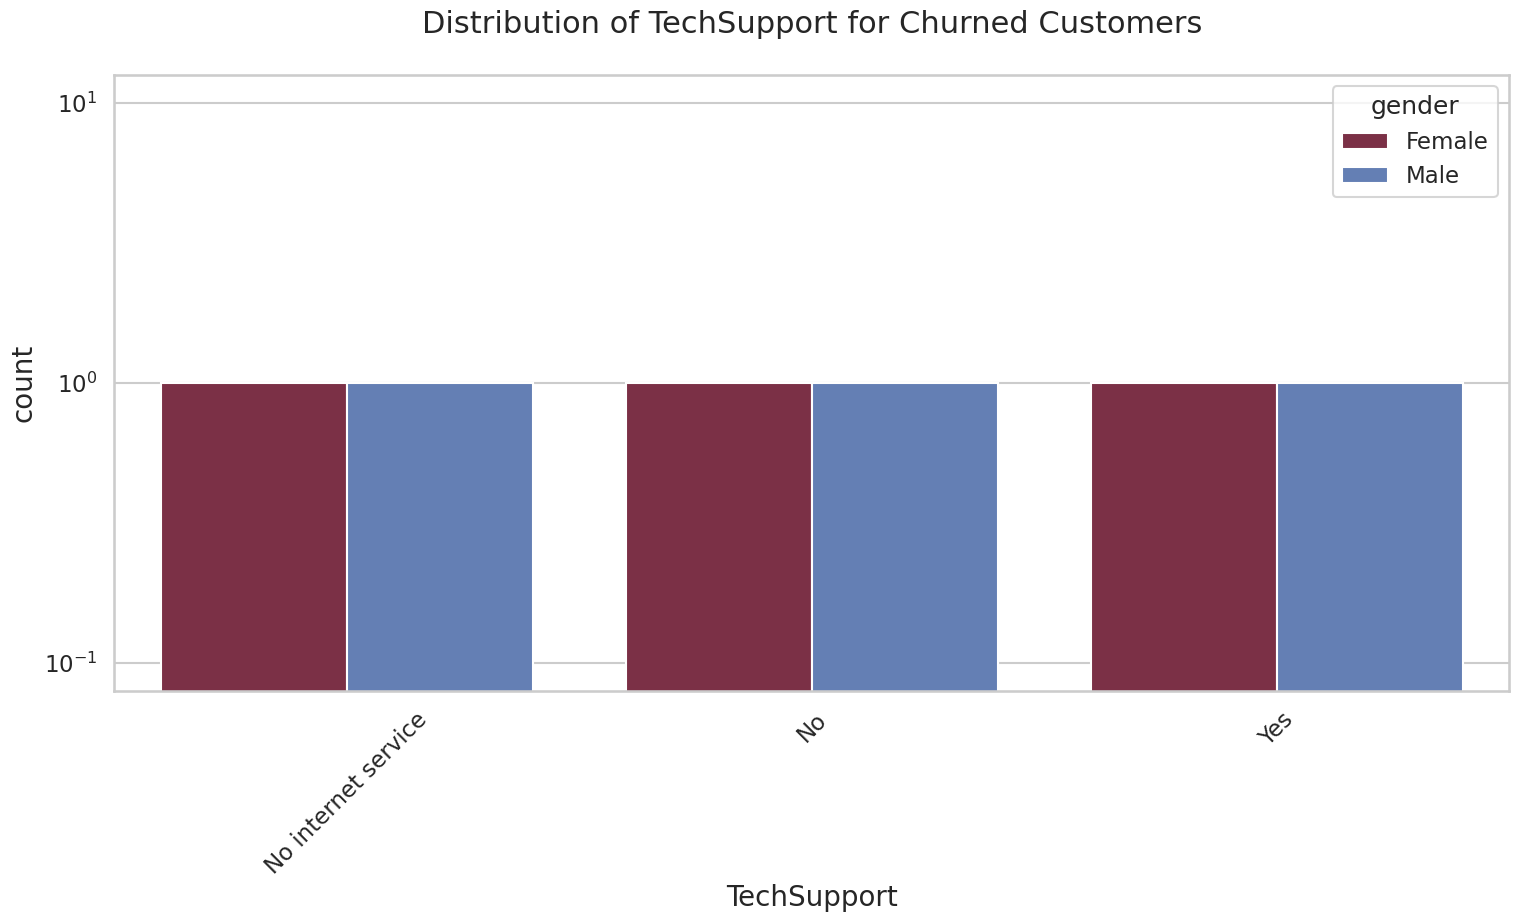

In [92]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

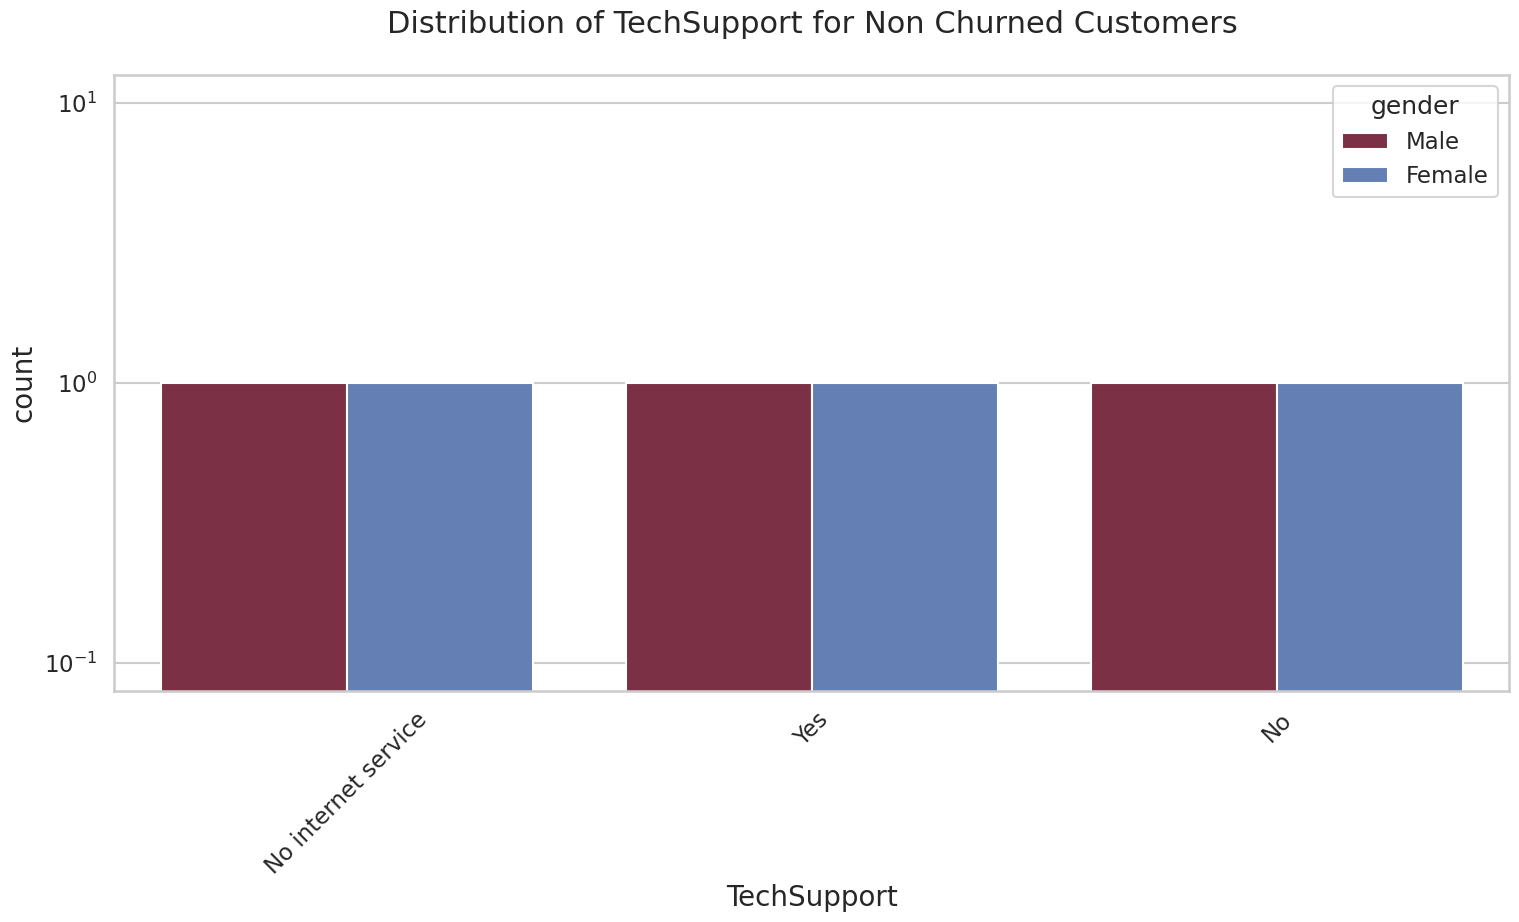

In [93]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of TechSupport for Non Churned Customers',hue='gender')

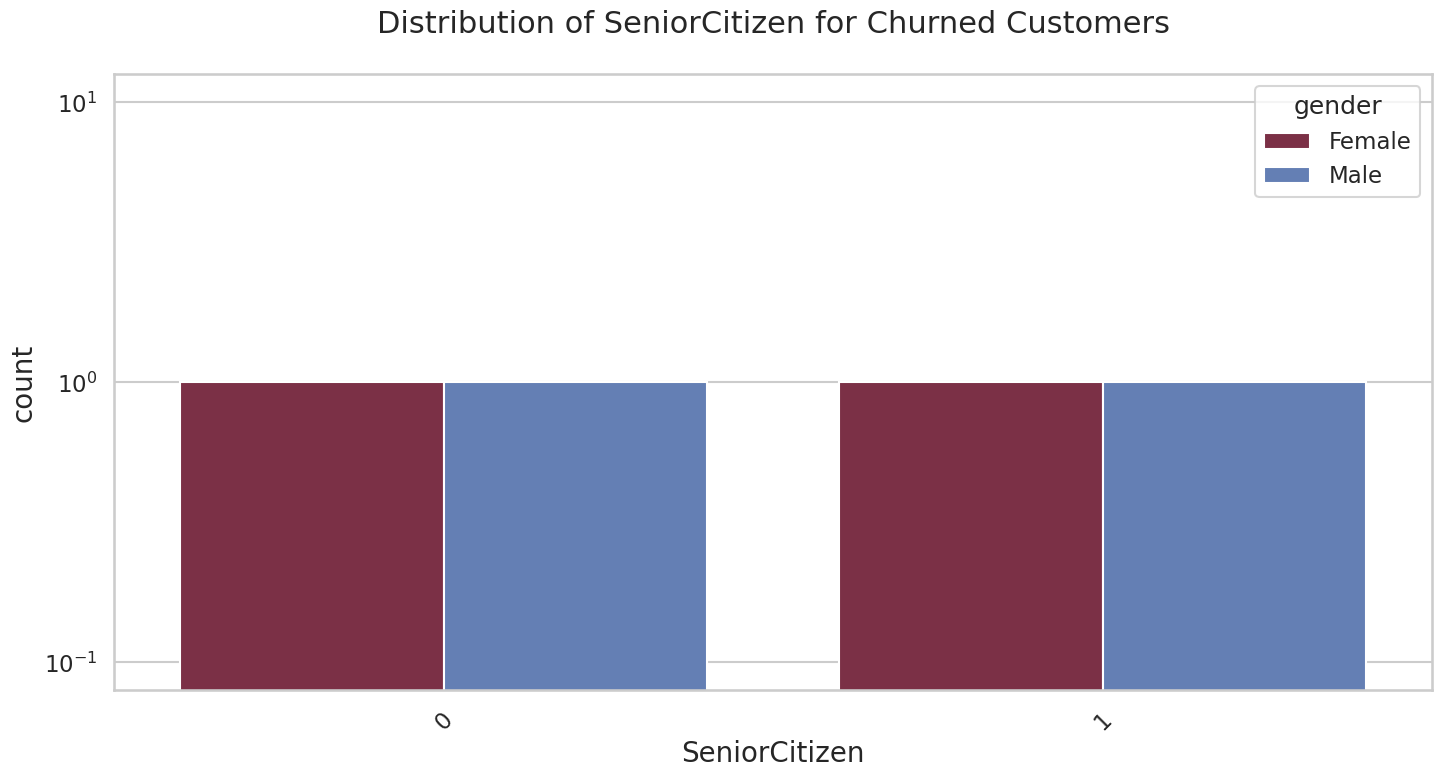

In [94]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

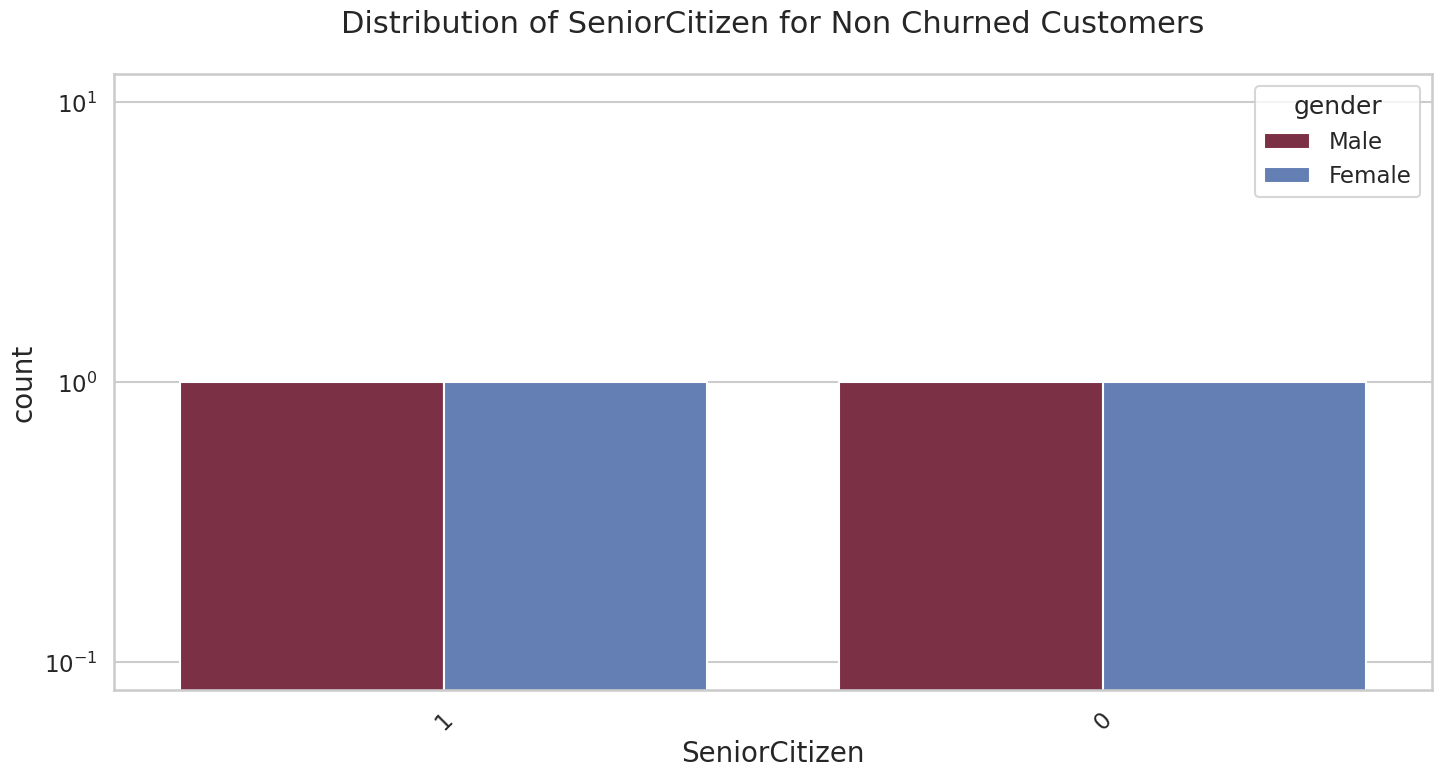

In [95]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of SeniorCitizen for Non Churned Customers',hue='gender')

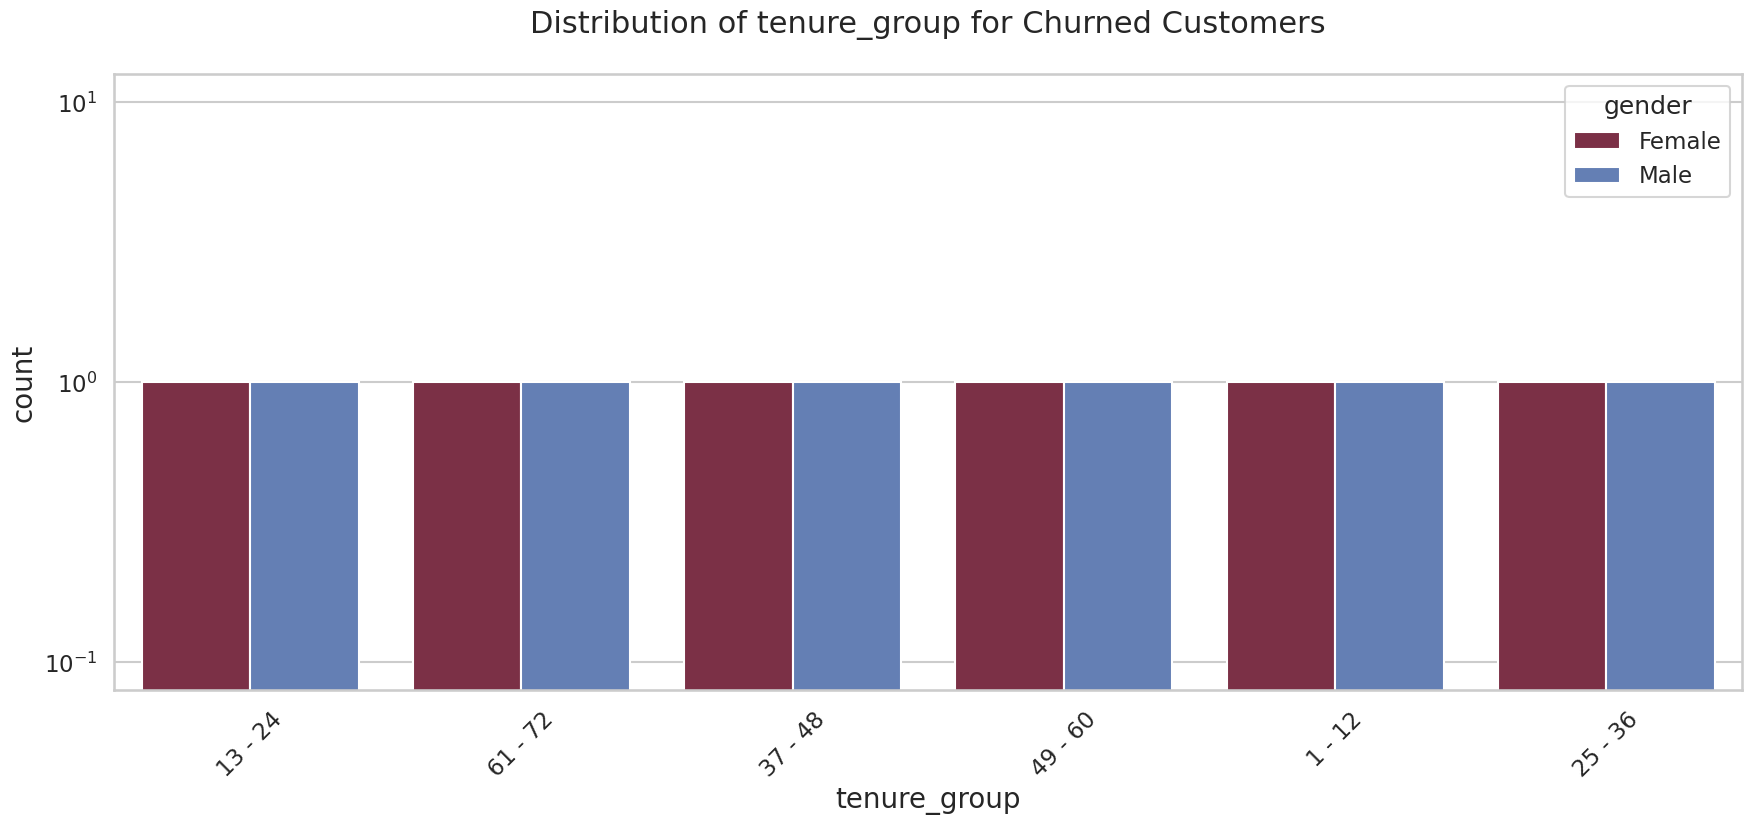

In [96]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='gender')

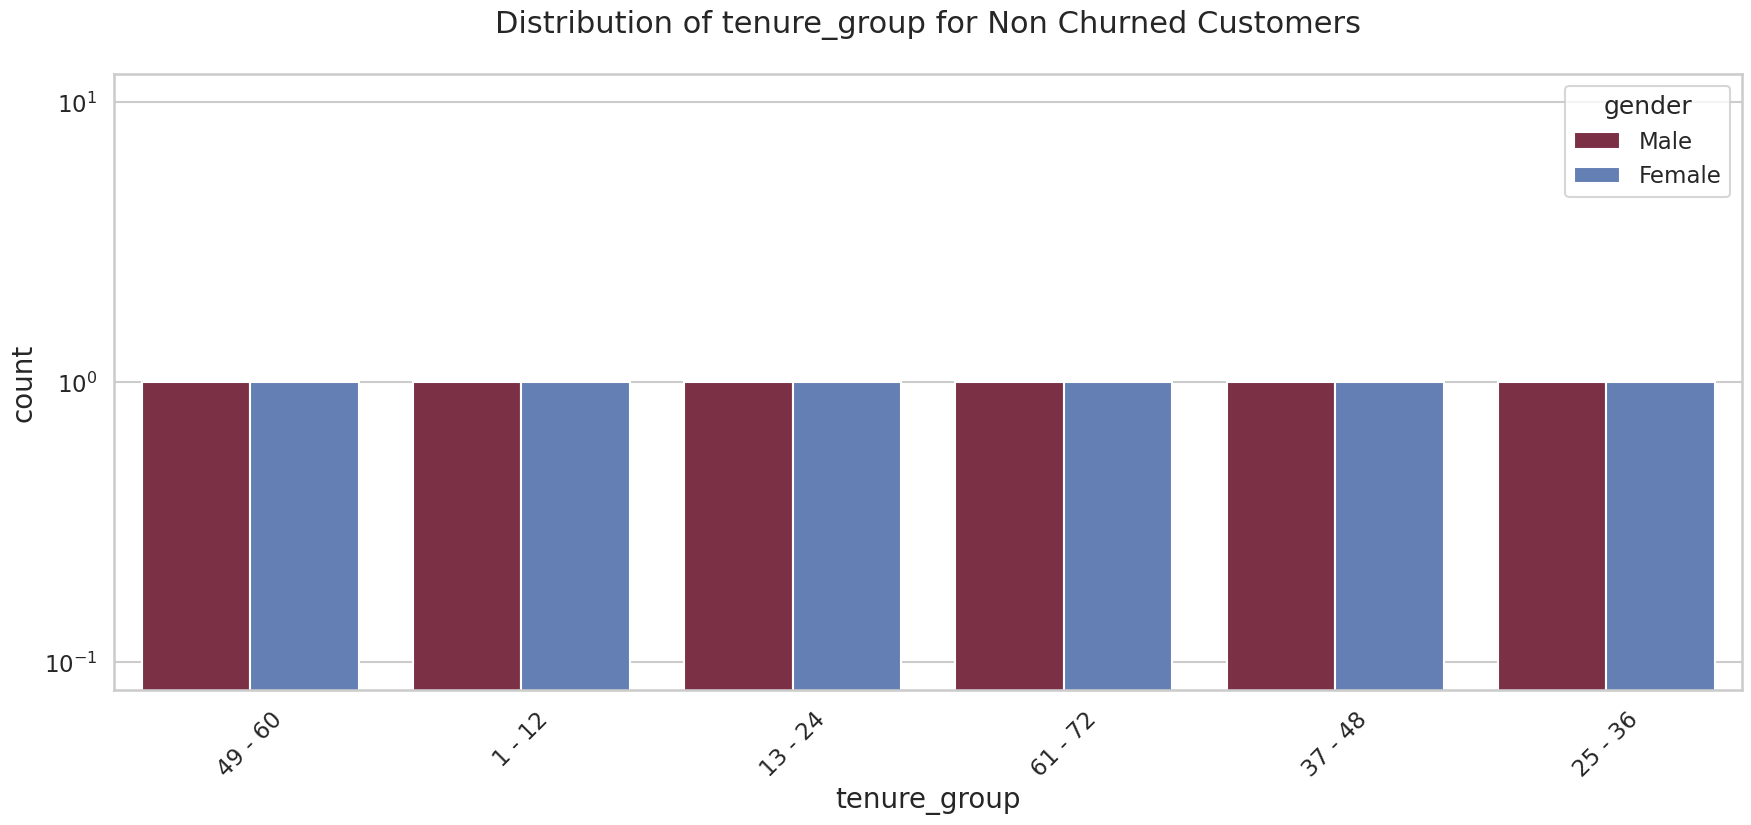

In [97]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of tenure_group for Non Churned Customers',hue='gender')

In [51]:
churn_pred_dummies.to_csv('churn_pred.csv')

**Create Model**


In [52]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [53]:
churn_pred_model=pd.read_csv("churn_pred.csv")

In [54]:
churn_pred_model.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,49.85,1146.55,0,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,False
1,1,0,100.70,4330.10,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False
2,2,1,97.33,4963.83,1,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,3,1,101.38,7299.36,0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,4,1,52.22,1305.50,1,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False


In [55]:
churn_pred_model=churn_pred_model.drop('Unnamed: 0',axis=1)

In [56]:
x=churn_pred_model.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,49.85,1146.55,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1,0,100.70,4330.10,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2,1,97.33,4963.83,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,101.38,7299.36,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,1,52.22,1305.50,True,False,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False


In [57]:
y=churn_pred_model['Churn']
y

,Churn
0,0
1,1
2,1
3,0
4,1
...,...
5875,0
5876,1
5877,0
5878,0


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Decision Tree Classifier**

In [60]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [61]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
model_dt.score(x_test,y_test)

0.4991496598639456

In [65]:
print(classification_report(y_test, y_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       571

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



**Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [68]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [69]:
y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
model_rf.score(x_test,y_test)

0.4931972789115646

In [71]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       605
           1       0.48      0.43      0.45       571

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.49      1176
weighted avg       0.49      0.49      0.49      1176



**Performing PCA**

In [72]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [73]:
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [74]:
model_pca.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [75]:
y_pred_pca = model_pca.predict(x_test_pca)
y_pred_pca

array([0, 1, 0, ..., 1, 0, 1])

In [76]:
model_pca.score(x_test_pca,y_test)

0.5

In [77]:
print(classification_report(y_test, y_pred_pca, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46       605
           1       0.49      0.60      0.54       571

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.50      1176
weighted avg       0.50      0.50      0.50      1176



**Conclusion**

**We used three different models—Decision Tree Classifier, Random Forest Classifier, and Principal Component Analysis (PCA)—to analyze our dataset. Interestingly, all three models produced the same results.**



**Since our dataset is balanced, there isn’t a significant difference between churn and non-churn customers, which explains why the models performed similarly.**